In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [5]:
players_info = pd.read_csv(r'C:\Users\Monitor\Desktop\Fifa_Players.csv')

C:\Users\Monitor\AppData\Local\Temp\ipykernel_11016\1051235768.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players_info = pd.read_csv(r'C:\Users\Monitor\Desktop\Fifa_Players.csv')


In [7]:
players_info.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [15]:
players_features = pd.Dataframe(pd.read_csv(r'C:\Users\Monitor\Desktop\Fifa_Players.csv' , usecols=['overall', 'potential', 'value_eur', 'wage_eur', 'age']))

AttributeError: module 'pandas' has no attribute 'Dataframe'

In [17]:
players_features = pd.read_csv(r'C:\Users\Monitor\Desktop\fifa_Players.csv', usecols=['overall', 'potential', 'value_eur', 'wage_eur', 'age'])


In [19]:
players_features

,overall,potential,value_eur,wage_eur,age
0,93,93,78000000.0,320000.0,34
1,92,92,119500000.0,270000.0,32
2,91,91,45000000.0,270000.0,36
3,91,91,129000000.0,270000.0,29
4,91,91,125500000.0,350000.0,30
...,...,...,...,...,...
19234,47,52,70000.0,1000.0,22
19235,47,59,110000.0,500.0,19
19236,47,55,100000.0,500.0,21
19237,47,60,110000.0,500.0,19


In [21]:
players_features.describe()

,overall,potential,value_eur,wage_eur,age
count,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000
mean,65.772182,71.079370,2.850452e+06,9017.989363,25.210822
std,6.880232,6.086213,7.613700e+06,19470.176724,4.748235
min,47.000000,49.000000,9.000000e+03,500.000000,16.000000
25%,61.000000,67.000000,4.750000e+05,1000.000000,21.000000
50%,66.000000,71.000000,9.750000e+05,3000.000000,25.000000
75%,70.000000,75.000000,2.000000e+06,8000.000000,29.000000
max,93.000000,95.000000,1.940000e+08,350000.000000,54.000000


In [23]:
players_features = players_features.dropna()

In [25]:
players_features 

,overall,potential,value_eur,wage_eur,age
0,93,93,78000000.0,320000.0,34
1,92,92,119500000.0,270000.0,32
2,91,91,45000000.0,270000.0,36
3,91,91,129000000.0,270000.0,29
4,91,91,125500000.0,350000.0,30
...,...,...,...,...,...
19234,47,52,70000.0,1000.0,22
19235,47,59,110000.0,500.0,19
19236,47,55,100000.0,500.0,21
19237,47,60,110000.0,500.0,19


In [27]:
#(value-mean)/SD
scaler= StandardScaler()

In [29]:
players_features_sc = scaler.fit_transform(players_features)

In [31]:
players_features_sc

array([[ 3.95776568,  3.60078658,  9.87056351, 15.96766844,  1.86359972],
       [ 3.81247225,  3.4365172 , 15.32140647, 13.40033986,  1.44053345],
       [ 3.66717883,  3.27224782,  5.53615826, 13.40033986,  2.28666598],
       ...,
       [-2.725732  , -2.64144996, -0.36125978, -0.4375612 , -0.886331  ],
       [-2.725732  , -1.82010304, -0.35994632, -0.4375612 , -1.30939726],
       [-2.725732  , -1.82010304, -0.35994632, -0.4375612 , -1.30939726]])

In [33]:
def best_K_Means(data, k_max):
    means = []
    inertias = []

    for k in range(1, k_max):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)

    # elbow plot
    fig = plt.subplots(figsize=(12, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('K Value')
    plt.ylabel('Inertias')
    plt.grid(True)
    plt.show()


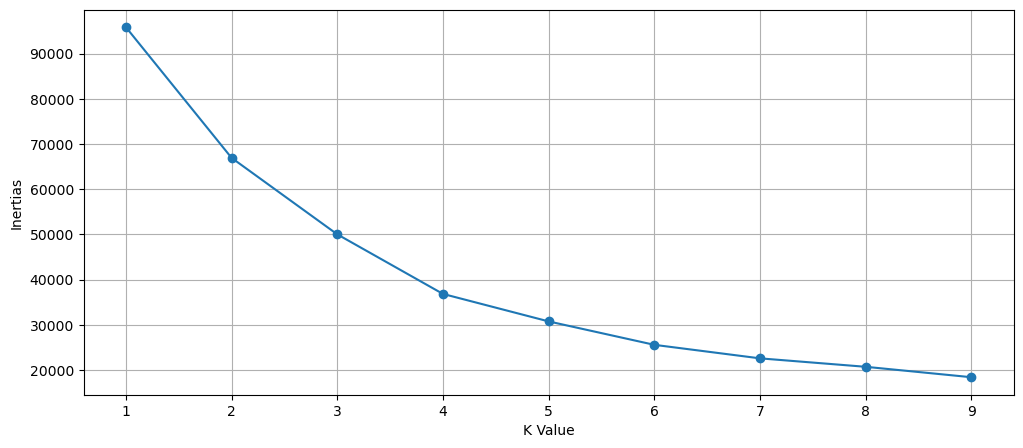

In [35]:
best_K_Means(players_features_sc,10)


In [39]:
K_Means - kMeans(n_clusters =3)

NameError: name 'K_Means' is not defined

In [45]:
kmeans = KMeans(n_clusters=3)


In [47]:
kmeans.fit(players_features_sc)

KMeans(n_clusters=3)

In [49]:
players_features.insert(5, 'K3', kmeans.labels_)

In [51]:
players_features

,overall,potential,value_eur,wage_eur,age,K3
0,93,93,78000000.0,320000.0,34,1
1,92,92,119500000.0,270000.0,32,1
2,91,91,45000000.0,270000.0,36,1
3,91,91,129000000.0,270000.0,29,1
4,91,91,125500000.0,350000.0,30,1
...,...,...,...,...,...,...
19234,47,52,70000.0,1000.0,22,0
19235,47,59,110000.0,500.0,19,0
19236,47,55,100000.0,500.0,21,0
19237,47,60,110000.0,500.0,19,0


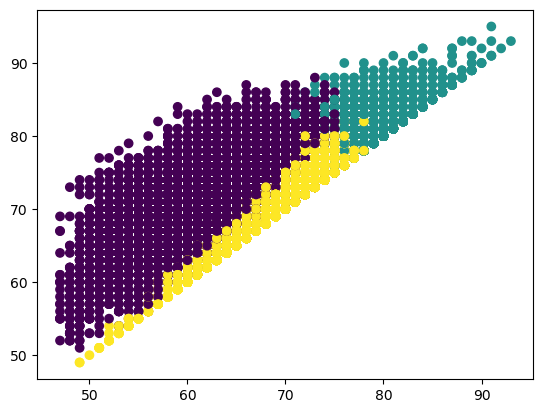

In [53]:
plt.scatter(x=players_features['overall'], 
            y=players_features['potential'], 
            c=players_features['K3'])
plt.show()


In [57]:
# Define K-Means with 2 clusters
# Fit to the scaled player features
# Insert the new labels into the DataFrame at position 6

kmeans = KMeans(n_clusters=2)                       
kmeans.fit(players_features_sc)                     
players_features.insert(6, 'K2', kmeans.labels_)  



In [59]:
players_features

,overall,potential,value_eur,wage_eur,age,K3,K2
0,93,93,78000000.0,320000.0,34,1,1
1,92,92,119500000.0,270000.0,32,1,1
2,91,91,45000000.0,270000.0,36,1,1
3,91,91,129000000.0,270000.0,29,1,1
4,91,91,125500000.0,350000.0,30,1,1
...,...,...,...,...,...,...,...
19234,47,52,70000.0,1000.0,22,0,0
19235,47,59,110000.0,500.0,19,0,0
19236,47,55,100000.0,500.0,21,0,0
19237,47,60,110000.0,500.0,19,0,0


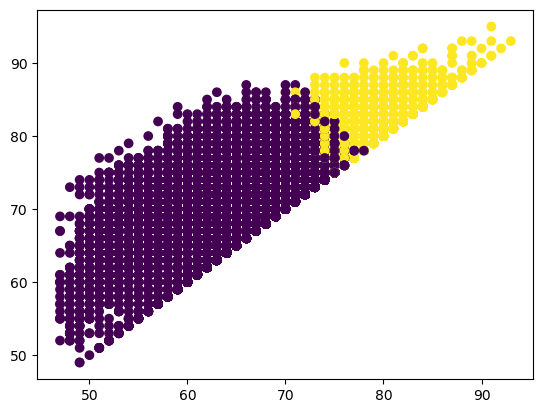

In [61]:
plt.scatter(x=players_features['overall'], 
            y=players_features['potential'], 
            c=players_features['K2'])
plt.show()